In [112]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#directory of mat file
mat_dir_post = '/Users/cresp1el/Documents/lmc_project_analysis_dir/cell93_post_spiketrains.mat'
mat_dir_pre = '/Users/cresp1el/Documents/lmc_project_analysis_dir/cell93_pre_spiketrains.mat'

#create a dictionary to store the data
mat_post = scipy.io.loadmat(mat_dir_post)
mat_pre = scipy.io.loadmat(mat_dir_pre)


In [3]:
#store the data in a 'spiketrains_pre and spiketrains_post' variable
spiketrains_pre = mat_pre['cell93_pre_spiketrains']
spiketrains_post = mat_post['cell93_post_spiketrains']

In [96]:
#make a function to store the pre and post spike matrices into a dict where the keys are the stimulus frequencies
def spiketrains_dict(spiketrains_pre, spiketrains_post):
    spiketrains_dict = {}
    spiketrains_dict['pre_zero'] = spiketrains_pre[0,0]
    spiketrains_dict['pre_low'] = spiketrains_pre[0,1]
    spiketrains_dict['pre_mid'] = spiketrains_pre[0,2]
    spiketrains_dict['pre_high'] = spiketrains_pre[0,3]
    spiketrains_dict['post_zero'] = spiketrains_post[0,0]
    spiketrains_dict['post_low'] = spiketrains_post[0,1]
    spiketrains_dict['post_mid'] = spiketrains_post[0,2]
    spiketrains_dict['post_high'] = spiketrains_post[0,3]
    return spiketrains_dict

#call the function to create the dictionarys
spiketrains_dict = spiketrains_dict(spiketrains_pre, spiketrains_post)

In [97]:
#make a function to calculate the mean firing rate for each stimulus frequency from dict of spike matrices and return a dict of mean firing rates where the keys are the stimulus frequencies
def mean_firing_rate_dict(spiketrains_dict):
    mean_firing_rate_dict = {}
    for key in spiketrains_dict:
        mean_firing_rate_dict[key] = np.mean(spiketrains_dict[key], axis=0)*1000 #multiply by 1000 to convert to Hz
    return mean_firing_rate_dict

#call the function to create the dictionary of mean firing rates
mean_firing_rate_dict = mean_firing_rate_dict(spiketrains_dict)


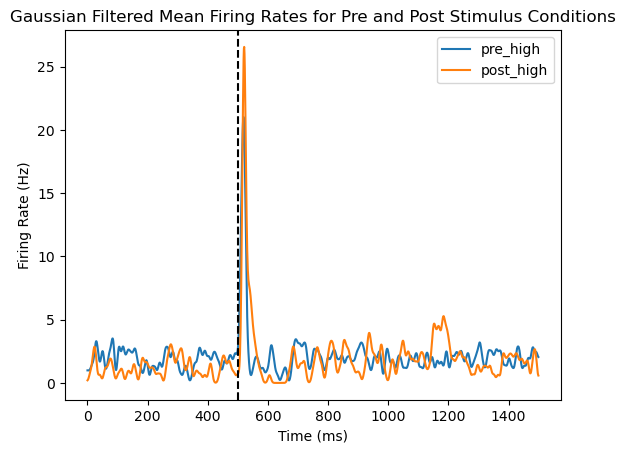

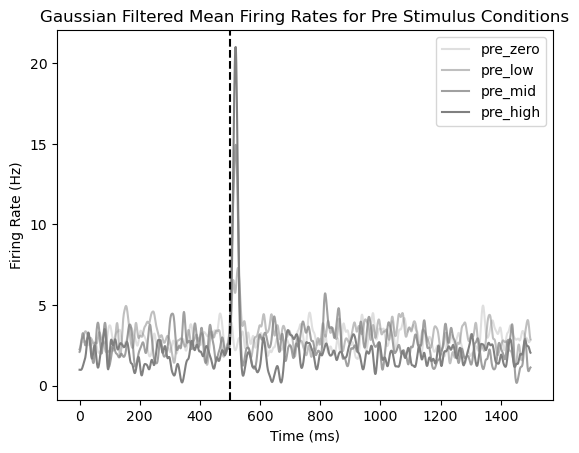

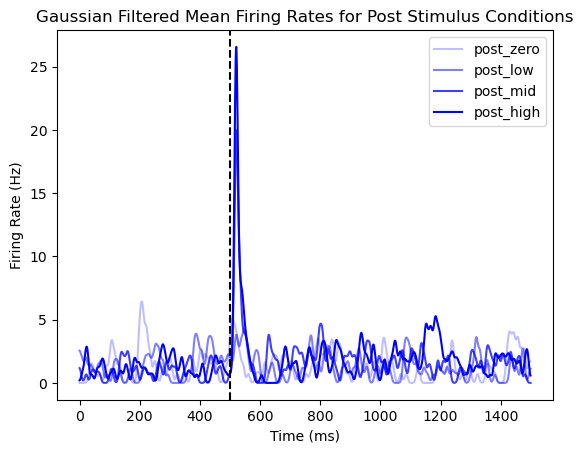

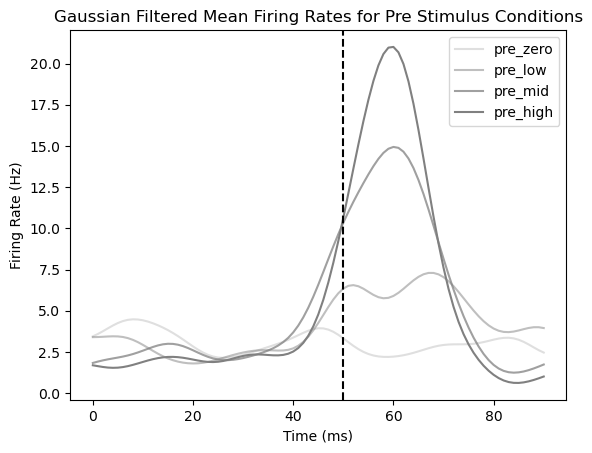

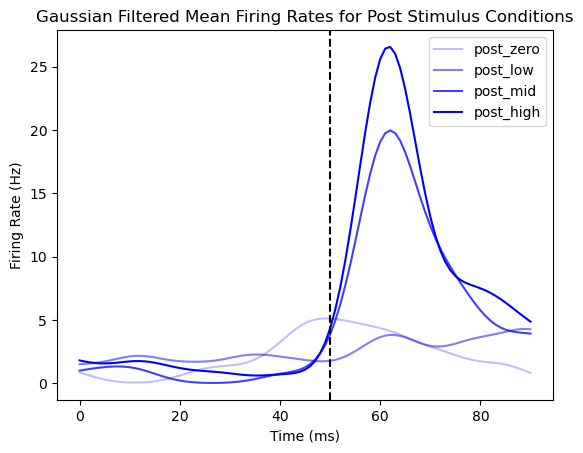

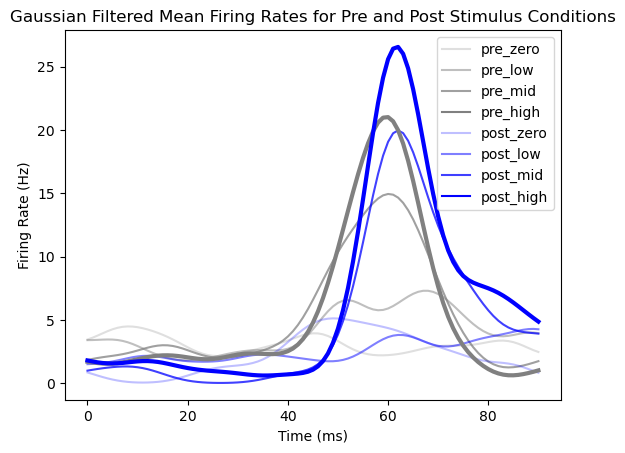

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Gaussian Filtered Mean Firing Rates for Pre and Post Stimulus Conditions'}, xlabel='Time (ms)', ylabel='Firing Rate (Hz)'>)

In [98]:
#gaussian filter the mean firing rates with user defined sigma and return a dict of gaussian filtered mean firing rates where the keys are the stimulus frequencies

from scipy.ndimage import gaussian_filter

#create a function to gaussian filter the mean firing rates with user defined sigma and return a dict of gaussian filtered mean firing rates where the keys are the stimulus frequencies
def gaussian_filter_dict(mean_firing_rate_dict, sigma):
    gaussian_filter_dict = {}
    for key in mean_firing_rate_dict:
        gaussian_filter_dict[key] = gaussian_filter(mean_firing_rate_dict[key], sigma=sigma)
    return gaussian_filter_dict

#call the function to create the dictionary of gaussian filtered mean firing rates
gaussian_filter_dict = gaussian_filter_dict(mean_firing_rate_dict, sigma=5)


#plot the gaussian filtered mean firing rates for the pre and post stimulus conditions on the same plot
def plot_gaussian_filter_dict(gaussian_filter_dict):
    fig, ax = plt.subplots(1,1)
    ax.plot(gaussian_filter_dict['pre_high'], label='pre_high')
    ax.plot(gaussian_filter_dict['post_high'], label='post_high')
    ax.legend()
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Firing Rate (Hz)')
    ax.set_title('Gaussian Filtered Mean Firing Rates for Pre and Post Stimulus Conditions')
    
    #add vertical lines to indicate the stimulus onset and offset times 
    ax.axvline(x=500, color='black', linestyle='--')
    
    plt.show()
    return fig, ax

#call the function to plot the gaussian filtered mean firing rates for the pre and post stimulus conditions on the same plot
plot_gaussian_filter_dict(gaussian_filter_dict)

#plot the gaussian filtered mean firing rates for all prestimulus conditions on the same plot with increasing opacity for increasing stimuli
# keep the color the same for all prestimulus conditions and change the opacity for each stimulus condition
def plot_gaussian_filter_dict_all(gaussian_filter_dict):
    fig, ax = plt.subplots(1,1)
    ax.plot(gaussian_filter_dict['pre_zero'], color='grey', alpha=0.25, label='pre_zero')
    ax.plot(gaussian_filter_dict['pre_low'], color='grey', alpha=0.5, label='pre_low')
    ax.plot(gaussian_filter_dict['pre_mid'], color='grey', alpha=0.75, label='pre_mid')
    ax.plot(gaussian_filter_dict['pre_high'], color='grey', alpha=1, label='pre_high')
    ax.legend()
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Firing Rate (Hz)')
    ax.set_title('Gaussian Filtered Mean Firing Rates for Pre Stimulus Conditions')
    
    #add vertical lines to indicate the stimulus onset and offset times 
    ax.axvline(x=500, color='black', linestyle='--')
    
    plt.show()
    return fig, ax

#call the function to plot the gaussian filtered mean firing rates for all prestimulus conditions on the same plot with increasing opacity for increasing stimuli
plot_gaussian_filter_dict_all(gaussian_filter_dict)


#now repeat the above for the post stimulus conditions
#plot the gaussian filtered mean firing rates for all poststimulus conditions on the same plot with increasing opacity for increasing stimuli
# keep the color the same for all poststimulus conditions and change the opacity for each stimulus condition
def plot_gaussian_filter_dict_all_post(gaussian_filter_dict):
    fig, ax = plt.subplots(1,1)
    ax.plot(gaussian_filter_dict['post_zero'], color='blue', alpha=0.25, label='post_zero')
    ax.plot(gaussian_filter_dict['post_low'], color='blue', alpha=0.5, label='post_low')
    ax.plot(gaussian_filter_dict['post_mid'], color='blue', alpha=0.75, label='post_mid')
    ax.plot(gaussian_filter_dict['post_high'], color='blue', alpha=1, label='post_high')
    ax.legend()
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Firing Rate (Hz)')
    ax.set_title('Gaussian Filtered Mean Firing Rates for Post Stimulus Conditions')
    
    #add vertical lines to indicate the stimulus onset and offset times 
    ax.axvline(x=500, color='black', linestyle='--')
    
    plt.show()
    return fig, ax

#call the function to plot the gaussian filtered mean firing rates for all poststimulus conditions on the same plot with increasing opacity for increasing stimuli
plot_gaussian_filter_dict_all_post(gaussian_filter_dict)

#now the same but zoom in from 459 to 550 ms
#plot the gaussian filtered mean firing rates for all prestimulus conditions on the same plot with increasing opacity for increasing stimuli
# keep the color the same for all prestimulus conditions and change the opacity for each stimulus condition
def plot_gaussian_filter_dict_all_zoom(gaussian_filter_dict):
    fig, ax = plt.subplots(1,1)
    ax.plot(gaussian_filter_dict['pre_zero'][459:550], color='grey', alpha=0.25, label='pre_zero')
    ax.plot(gaussian_filter_dict['pre_low'][459:550], color='grey', alpha=0.5, label='pre_low')
    ax.plot(gaussian_filter_dict['pre_mid'][459:550], color='grey', alpha=0.75, label='pre_mid')
    ax.plot(gaussian_filter_dict['pre_high'][459:550], color='grey', alpha=1, label='pre_high')
    ax.legend()
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Firing Rate (Hz)')
    ax.set_title('Gaussian Filtered Mean Firing Rates for Pre Stimulus Conditions')
        #add vertical lines to indicate the stimulus onset and offset times 
    ax.axvline(x=50, color='black', linestyle='--')
    plt.show()
    return fig, ax

#call the function to plot the gaussian filtered mean firing rates for all prestimulus conditions on the same plot with increasing opacity for increasing stimuli
plot_gaussian_filter_dict_all_zoom(gaussian_filter_dict)

#now repeat this plot for the post stimulus conditions
#plot the gaussian filtered mean firing rates for all poststimulus conditions on the same plot with increasing opacity for increasing stimuli
# keep the color the same for all poststimulus conditions and change the opacity for each stimulus condition
def plot_gaussian_filter_dict_all_post_zoom(gaussian_filter_dict):
    fig, ax = plt.subplots(1,1)
    ax.plot(gaussian_filter_dict['post_zero'][459:550], color='blue', alpha=0.25, label='post_zero')
    ax.plot(gaussian_filter_dict['post_low'][459:550], color='blue', alpha=0.5, label='post_low')
    ax.plot(gaussian_filter_dict['post_mid'][459:550], color='blue', alpha=0.75, label='post_mid')
    ax.plot(gaussian_filter_dict['post_high'][459:550], color='blue', alpha=1, label='post_high')
    ax.legend()
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Firing Rate (Hz)')
    ax.set_title('Gaussian Filtered Mean Firing Rates for Post Stimulus Conditions')
    ax.axvline(x=50, color='black', linestyle='--') 
    plt.show()
    return fig, ax

#call the function to plot the gaussian filtered mean firing rates for all poststimulus conditions on the same plot with increasing opacity for increasing stimuli
plot_gaussian_filter_dict_all_post_zoom(gaussian_filter_dict)


#now over lay the zoomed in pre and post stimulus conditions on the same plot

def plot_gaussian_filter_dict_all_zoom_overlay(gaussian_filter_dict):
    fig, ax = plt.subplots(1,1)
    ax.plot(gaussian_filter_dict['pre_zero'][459:550], color='grey', alpha=0.25, label='pre_zero')
    ax.plot(gaussian_filter_dict['pre_low'][459:550], color='grey', alpha=0.5, label='pre_low')
    ax.plot(gaussian_filter_dict['pre_mid'][459:550], color='grey', alpha=0.75, label='pre_mid')
    ax.plot(gaussian_filter_dict['pre_high'][459:550], color='grey', alpha=1, label='pre_high')
    ax.plot(gaussian_filter_dict['post_zero'][459:550], color='blue', alpha=0.25, label='post_zero')
    ax.plot(gaussian_filter_dict['post_low'][459:550], color='blue', alpha=0.5, label='post_low')
    ax.plot(gaussian_filter_dict['post_mid'][459:550], color='blue', alpha=0.75, label='post_mid')
    ax.plot(gaussian_filter_dict['post_high'][459:550], color='blue', alpha=1, label='post_high')
    ax.legend()
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Firing Rate (Hz)')
    ax.set_title('Gaussian Filtered Mean Firing Rates for Pre and Post Stimulus Conditions')
    
    #make the high stimulus conditions more thick to make it easier to see
    ax.plot(gaussian_filter_dict['pre_high'][459:550], color='grey', alpha=1, linewidth=3)
    ax.plot(gaussian_filter_dict['post_high'][459:550], color='blue', alpha=1, linewidth=3)
    
    plt.show()
    return fig, ax

#call the function to plot the gaussian filtered mean firing rates for all prestimulus conditions on the same plot with increasing opacity for increasing stimuli
plot_gaussian_filter_dict_all_zoom_overlay(gaussian_filter_dict)

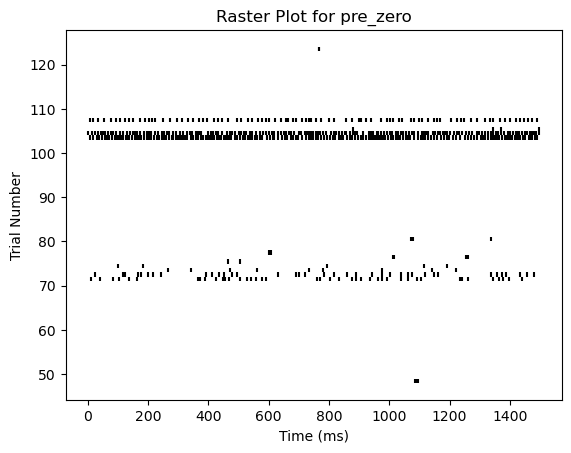

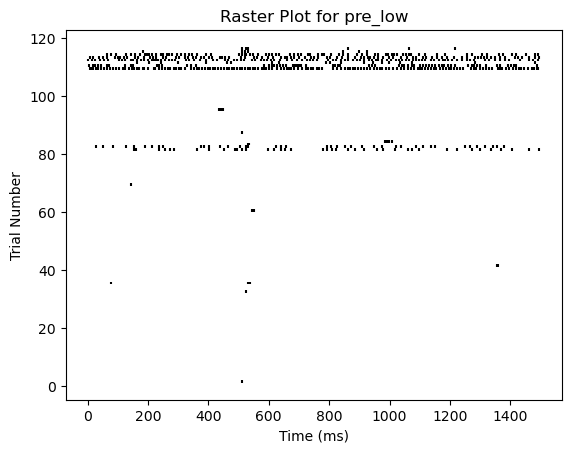

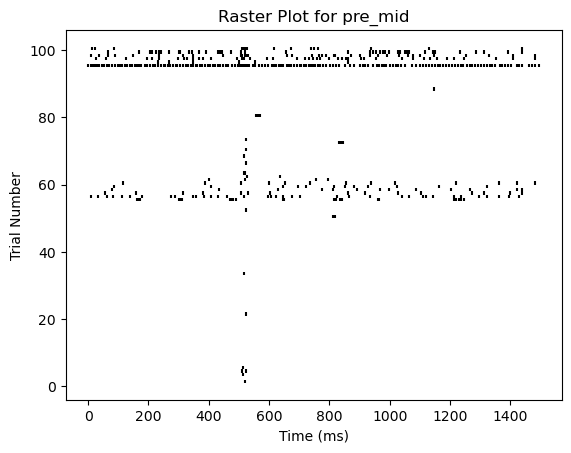

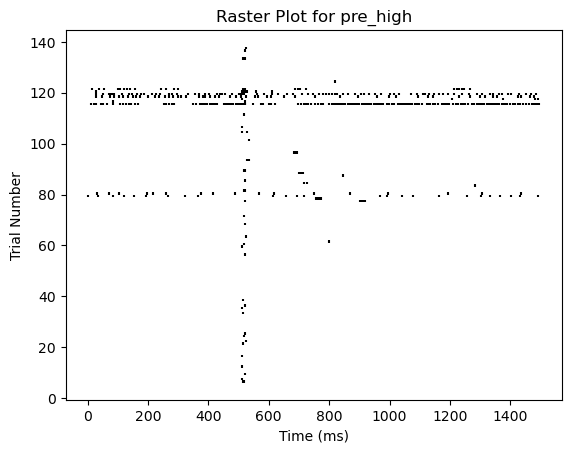

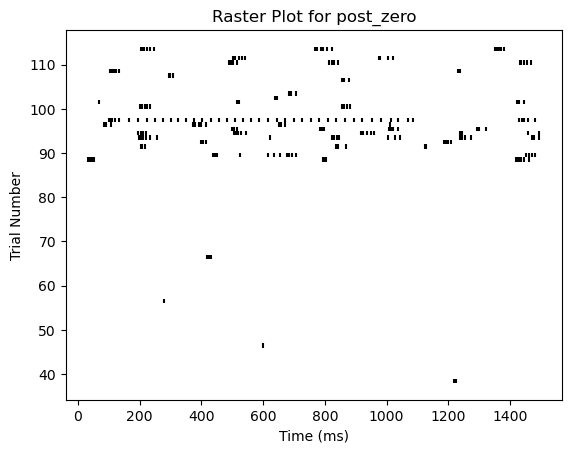

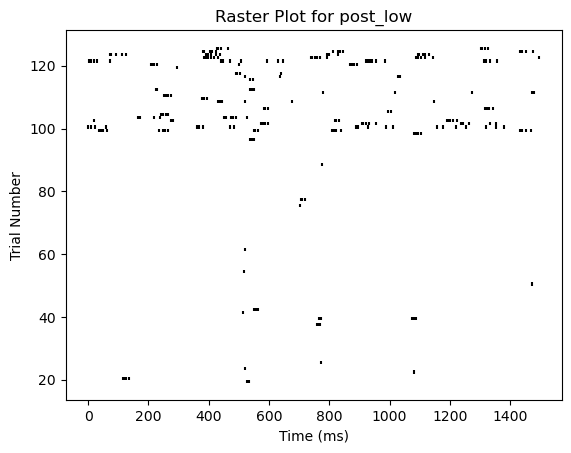

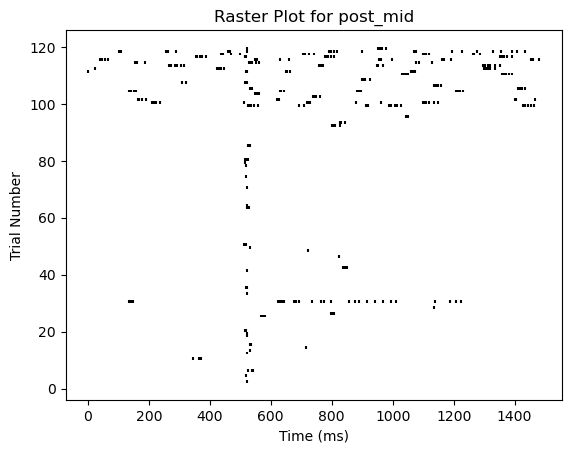

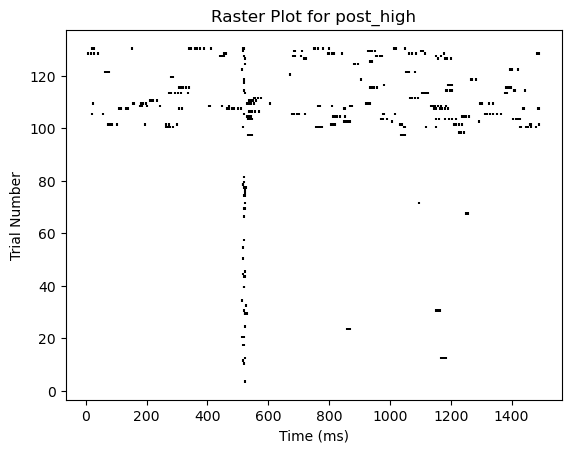

In [99]:
#now loop through the keys in the spiketrains_dict and plot a new raster plot for each key
for key in spiketrains_dict:
    spikes = spiketrains_dict[key]
    fig, ax = plt.subplots(1, 1)
    for i in range(spikes.shape[0]):
        spike_times = np.where(spikes[i] == 1)[0]
        ax.vlines(spike_times, i, i+1, color='black')
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Trial Number')
    ax.set_title('Raster Plot for ' + key)
    plt.show()
    

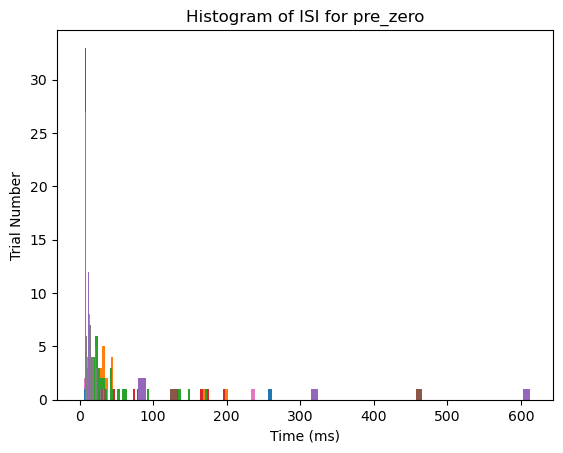

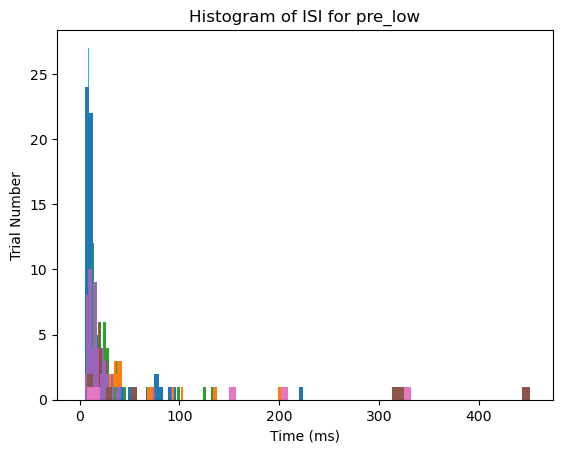

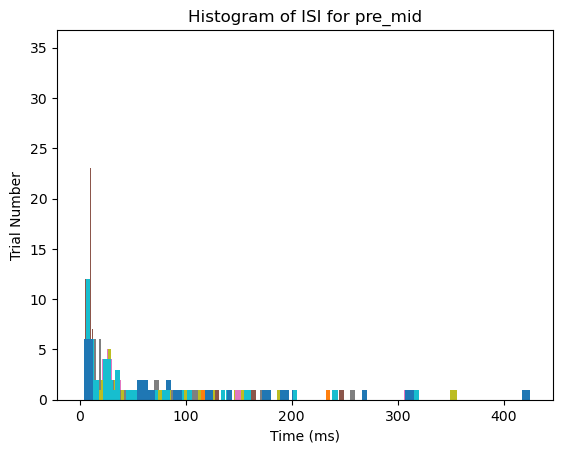

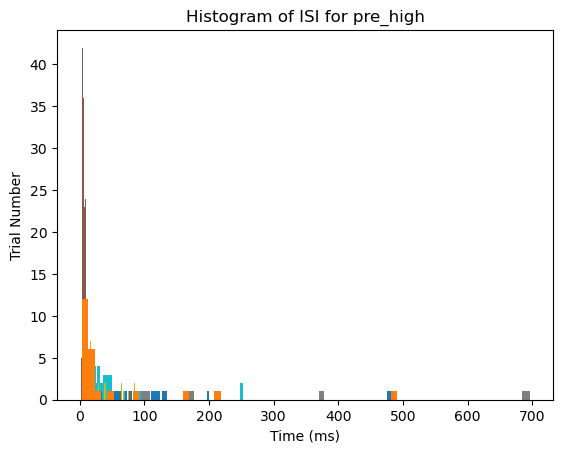

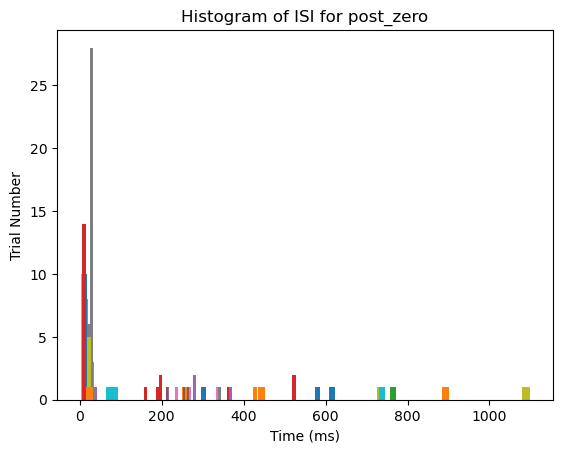

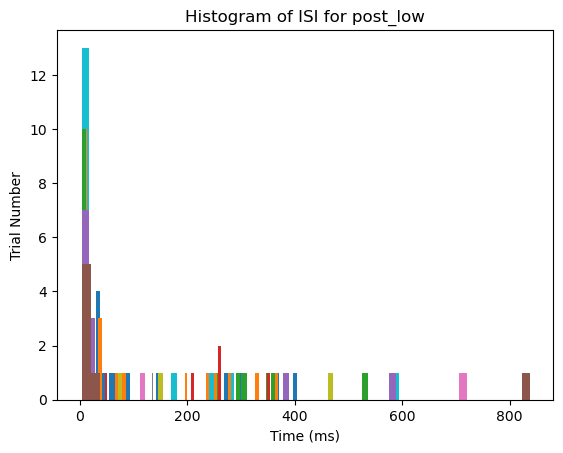

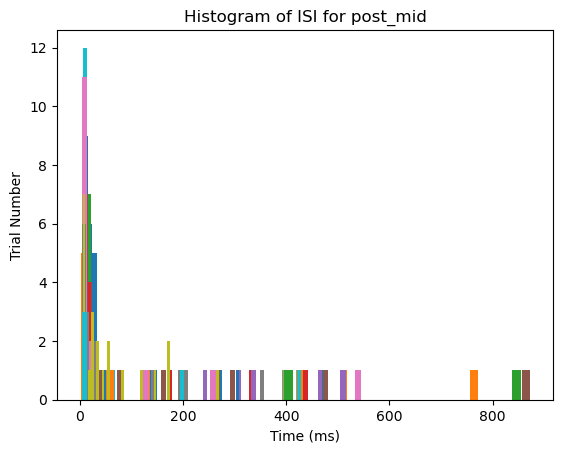

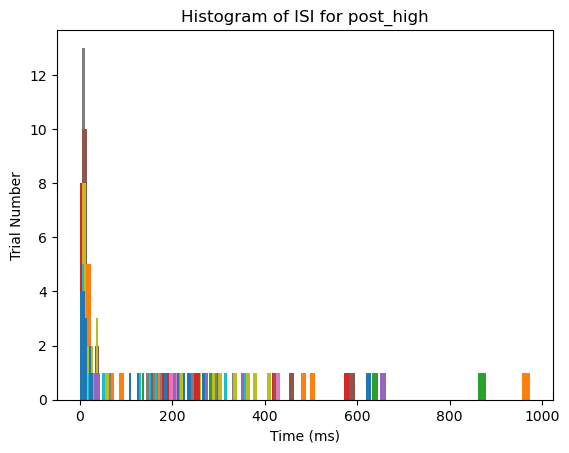

In [100]:
#now calculate the ISI for each spike train and plot the histogram of the ISI for each spike train
for key in spiketrains_dict:
    spikes = spiketrains_dict[key]
    fig, ax = plt.subplots(1, 1)
    for i in range(spikes.shape[0]):
        spike_times = np.where(spikes[i] == 1)[0]
        ISI = np.diff(spike_times)
        ax.hist(ISI, bins=50)
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Trial Number')
    ax.set_title('Histogram of ISI for ' + key)
    plt.show()

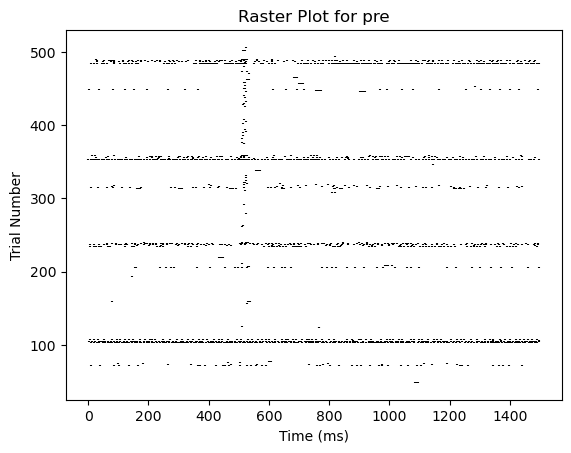

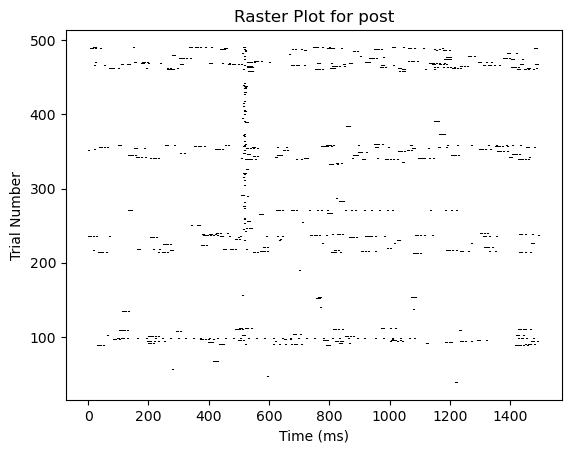

In [101]:
#now combine the pre matrices into one matrix and the post matrices into one matrix based on the keys names in the spiketrains_dict
#rename the keys in the spiketrains_dict to be pre and post
spiketrains_dict['pre'] = spiketrains_dict.pop('pre_zero')
spiketrains_dict['pre'] = np.vstack((spiketrains_dict['pre'], spiketrains_dict.pop('pre_low')))
spiketrains_dict['pre'] = np.vstack((spiketrains_dict['pre'], spiketrains_dict.pop('pre_mid')))
spiketrains_dict['pre'] = np.vstack((spiketrains_dict['pre'], spiketrains_dict.pop('pre_high')))
spiketrains_dict['post'] = spiketrains_dict.pop('post_zero')
spiketrains_dict['post'] = np.vstack((spiketrains_dict['post'], spiketrains_dict.pop('post_low')))
spiketrains_dict['post'] = np.vstack((spiketrains_dict['post'], spiketrains_dict.pop('post_mid')))
spiketrains_dict['post'] = np.vstack((spiketrains_dict['post'], spiketrains_dict.pop('post_high')))


#now plot the raster plot for the pre and post stimulus conditions
for key in spiketrains_dict:
    spikes = spiketrains_dict[key]
    fig, ax = plt.subplots(1, 1)
    for i in range(spikes.shape[0]):
        spike_times = np.where(spikes[i] == 1)[0]
        ax.vlines(spike_times, i, i+1, color='black')
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Trial Number')
    ax.set_title('Raster Plot for ' + key)
    plt.show()
    
    

/var/folders/ws/rz9dhstn6hbcglgm5d7dxjdw0000gq/T/ipykernel_88536/3140422678.py:58: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ISI, hist=False, color='grey')
/var/folders/ws/rz9dhstn6hbcglgm5d7dxjdw0000gq/T/ipykernel_88536/3140422678.py:58: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

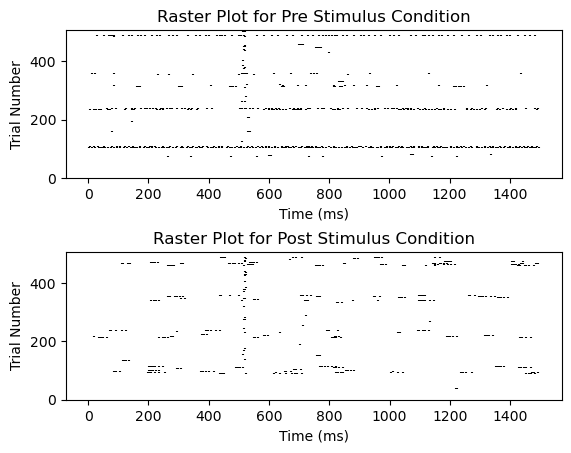

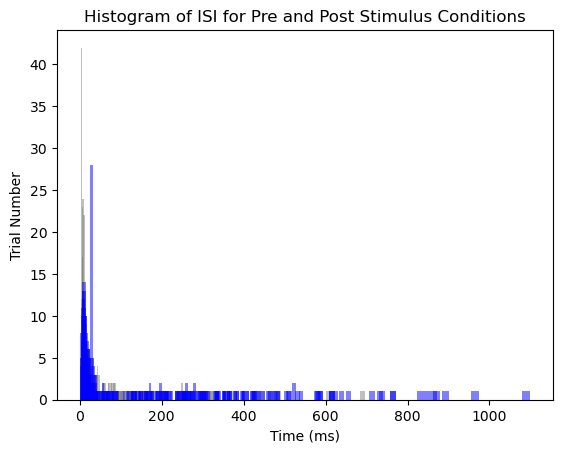

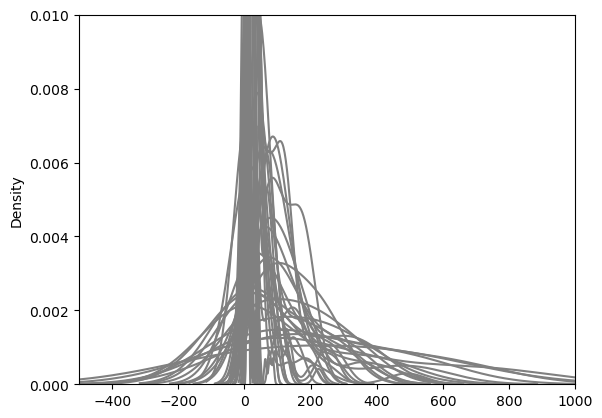

In [121]:
#create a matrix called pre_matrix annd post_matrix from the spiketrains_dict
pre_matrix = spiketrains_dict['pre']
post_matrix = spiketrains_dict['post']

#now create a subplot with 2 rows and 1 column
#using the pre_matrix and post_matrix, plot the raster plots for the pre and post stimulus conditions
fig, ax = plt.subplots(2, 1)
for i in range(pre_matrix.shape[0]):
    spike_times = np.where(pre_matrix[i] == 1)[0]
    ax[0].vlines(spike_times, i, i+1, color='black')
ax[0].set_xlabel('Time (ms)')
ax[0].set_ylabel('Trial Number')
ax[0].set_title('Raster Plot for Pre Stimulus Condition')

for i in range(post_matrix.shape[0]):
    spike_times = np.where(post_matrix[i] == 1)[0]
    ax[1].vlines(spike_times, i, i+1, color='black')
ax[1].set_xlabel('Time (ms)')
ax[1].set_ylabel('Trial Number')
ax[1].set_title('Raster Plot for Post Stimulus Condition')

#create more spave between the two plots and keep both y axes the same which ever is larger

#find the max y value for the pre and post stimulus conditions
pre_max_y = pre_matrix.shape[0]
post_max_y = post_matrix.shape[0]

#set the y limits for both plots to be the max y value
ax[0].set_ylim(0, max(pre_max_y, post_max_y))
ax[1].set_ylim(0, max(pre_max_y, post_max_y))

#set the space between the two plots to be 0.5

fig.subplots_adjust(hspace=0.5)

#now plot the ISI for the pre and post stimulus conditions 
#pre stimulus condition is in blue and post stimulus condition is in red
fig, ax = plt.subplots(1, 1)
for i in range(pre_matrix.shape[0]):
    spike_times = np.where(pre_matrix[i] == 1)[0]
    ISI = np.diff(spike_times)
    ax.hist(ISI, bins=50, color='grey', alpha=0.5)
for i in range(post_matrix.shape[0]):
    spike_times = np.where(post_matrix[i] == 1)[0]
    ISI = np.diff(spike_times)
    ax.hist(ISI, bins=50, color='blue', alpha=0.5)
    
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Trial Number')
ax.set_title('Histogram of ISI for Pre and Post Stimulus Conditions')

#now create a smpoothed histogram of the ISI for the pre and post stimulus conditions
#pre stimulus condition is in blue and post stimulus condition is in red
fig, ax = plt.subplots(1, 1)
for i in range(pre_matrix.shape[0]):
    spike_times = np.where(pre_matrix[i] == 1)[0]
    ISI = np.diff(spike_times)
    sns.distplot(ISI, hist=False, color='grey')
    #zoom in on the y axis to see the distribution better
    ax.set_ylim(0, 0.01)
    ax.set_xlim(-500, 1000)

/var/folders/ws/rz9dhstn6hbcglgm5d7dxjdw0000gq/T/ipykernel_88536/2871343063.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ISI, hist=False, color='blue')
/var/folders/ws/rz9dhstn6hbcglgm5d7dxjdw0000gq/T/ipykernel_88536/2871343063.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

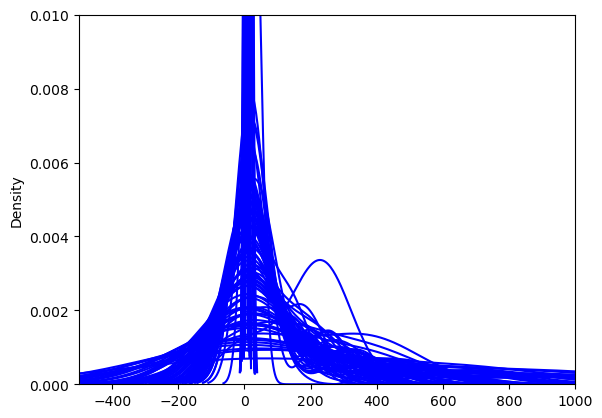

In [123]:
#now create a smpoothed histogram of the ISI for the post stimulus conditions
#post stimulus condition is in blue
fig, ax = plt.subplots(1, 1)
for i in range(post_matrix.shape[0]):
    spike_times = np.where(post_matrix[i] == 1)[0]
    ISI = np.diff(spike_times)
    sns.distplot(ISI, hist=False, color='blue')
    #zoom in on the y axis to see the distribution better
    ax.set_ylim(0, 0.01)
    ax.set_xlim(-500, 1000)
    

/var/folders/ws/rz9dhstn6hbcglgm5d7dxjdw0000gq/T/ipykernel_88536/2806755073.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(ISI, color='grey')
/var/folders/ws/rz9dhstn6hbcglgm5d7dxjdw0000gq/T/ipykernel_88536/2806755073.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(ISI, color='grey')
/var/folders/ws/rz9dhstn6hbcglgm5d7dxjdw0000gq/T/ipykernel_88536/2806755073.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(ISI, color='grey')
/var/folders/ws/rz9dhstn6hbcglgm5d7dxjdw0000gq/T/ipykernel_88536/2806755073.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(ISI, color='grey')
/var/folders/ws/rz9dhstn6hbcglgm5d7dxjdw0000gq/T/ipykernel_88536/2806755073.

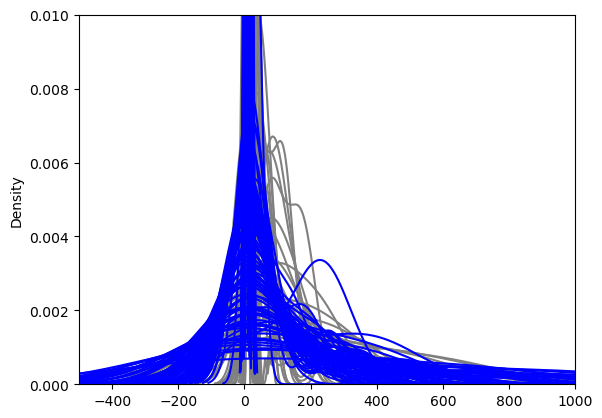

In [124]:
#gaussian kernel density estimation
#now create a smpoothed histogram of the ISI for the pre and post stimulus conditions
#pre stimulus condition is in grey and post stimulus condition is in blue
fig, ax = plt.subplots(1, 1)
for i in range(pre_matrix.shape[0]):
    spike_times = np.where(pre_matrix[i] == 1)[0]
    ISI = np.diff(spike_times)
    
    #zoom in on the y axis to see the distribution better
    ax.set_ylim(0, 0.01)
    ax.set_xlim(-500, 1000)
    
for i in range(post_matrix.shape[0]):
    spike_times = np.where(post_matrix[i] == 1)[0]
    ISI = np.diff(spike_times)
    sns.kdeplot(ISI, color='blue')
    #zoom in on the y axis to see the distribution better
    ax.set_ylim(0, 0.01)
    ax.set_xlim(-500, 1000)
    
    